<a href="https://colab.research.google.com/github/chenphopp/marketing_segmentation/blob/main/9_Telco_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
df = pd.read_excel("telco.xlsx")
print(df.shape)
df.head()

(2000, 19)


,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          2000 non-null   object 
 1   AccountLength  2000 non-null   int64  
 2   AreaCode       2000 non-null   int64  
 3   Phone          2000 non-null   object 
 4   IntlPlan       2000 non-null   object 
 5   VMailPlan      2000 non-null   object 
 6   VMailMessage   2000 non-null   int64  
 7   DayMins        2000 non-null   float64
 8   DayCalls       2000 non-null   int64  
 9   DayCharge      2000 non-null   float64
 10  EveMins        2000 non-null   float64
 11  EveCalls       2000 non-null   int64  
 12  EveCharge      2000 non-null   float64
 13  NightMins      2000 non-null   float64
 14  NightCalls     2000 non-null   int64  
 15  NightCharge    2000 non-null   float64
 16  IntlMins       2000 non-null   float64
 17  IntlCalls      2000 non-null   int64  
 18  IntlChar

In [ ]:
# ตั้งค่า 'Phone' เป็น index
df = df.set_index("Phone")
print(df.shape)
df.head()

(2000, 18)


,State,AccountLength,AreaCode,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge
Phone,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [ ]:
# check pearson correlation in columns which contain Day , Eve , Night , Intl
correlation_matrix = df[['DayMins', 'DayCalls', 'DayCharge',
                         'EveMins', 'EveCalls', 'EveCharge',
                         'NightMins', 'NightCalls', 'NightCharge',
                         'IntlMins', 'IntlCalls', 'IntlCharge']].corr()

def highlight(val):
    color = 'background-color: orange' if abs(val) > 0.7 else ''
    return color

# ใช้ style กับ applymap (ใช้กับแต่ละเซลล์)
#correlation_matrix = df.style.applymap(highlight)

display(correlation_matrix.style.applymap(highlight))

C:\Users\user\AppData\Local\Temp\ipykernel_24540\4000931044.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(correlation_matrix.style.applymap(highlight))


,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge
DayMins,1.000000,0.022378,1.000000,-0.003533,0.027185,-0.003547,0.022609,0.013310,0.022596,-0.023615,0.013427,-0.023572
DayCalls,0.022378,1.000000,0.022376,-0.020125,0.011202,-0.020122,0.005126,-0.025423,0.005120,-0.003015,0.005963,-0.002775
DayCharge,1.000000,0.022376,1.000000,-0.003523,0.027187,-0.003537,0.022615,0.013318,0.022603,-0.023616,0.013423,-0.023572
EveMins,-0.003533,-0.020125,-0.003523,1.000000,-0.028057,1.000000,-0.022631,-0.012449,-0.022626,-0.013418,0.025707,-0.013436
EveCalls,0.027185,0.011202,0.027187,-0.028057,1.000000,-0.028061,-0.005918,0.017235,-0.005859,0.027517,0.010409,0.027462
EveCharge,-0.003547,-0.020122,-0.003537,1.000000,-0.028061,1.000000,-0.022625,-0.012442,-0.022620,-0.013441,0.025699,-0.013459
NightMins,0.022609,0.005126,0.022615,-0.022631,-0.005918,-0.022625,1.000000,0.004730,0.999999,-0.009208,-0.011548,-0.009191
NightCalls,0.013310,-0.025423,0.013318,-0.012449,0.017235,-0.012442,0.004730,1.000000,0.004736,0.007565,-0.010235,0.007579
NightCharge,0.022596,0.005120,0.022603,-0.022626,-0.005859,-0.022620,0.999999,0.004736,1.000000,-0.009177,-0.011530,-0.009160
IntlMins,-0.023615,-0.003015,-0.023616,-0.013418,0.027517,-0.013441,-0.009208,0.007565,-0.009177,1.000000,0.043140,0.999993


In [ ]:
df = df.drop(columns=["DayCharge","EveCharge","NightCharge","IntlCharge"])
df = df.drop(columns=["AccountLength","State","AreaCode"])

for col in ['IntlPlan','VMailPlan']:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower().map({'yes':1,'no':0})

#df.info()
df.head()
df.describe()

,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,EveMins,EveCalls,NightMins,NightCalls,IntlMins,IntlCalls
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,0.091500,0.278000,8.172000,179.275250,100.616000,201.575750,100.487000,200.630250,100.113500,10.2545,4.465500
std,0.288391,0.448125,13.753181,55.291711,19.804208,50.979719,19.721874,51.180002,19.605964,2.7745,2.484531
min,0.000000,0.000000,0.000000,2.600000,35.000000,31.200000,36.000000,45.000000,33.000000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,143.200000,87.000000,167.075000,87.000000,167.175000,87.000000,8.4000,3.000000
50%,0.000000,0.000000,0.000000,180.300000,101.000000,202.600000,101.000000,201.300000,100.000000,10.3000,4.000000
75%,0.000000,1.000000,20.000000,216.000000,114.000000,235.525000,114.000000,234.700000,114.000000,12.1000,6.000000
max,1.000000,1.000000,49.000000,350.800000,163.000000,363.700000,164.000000,395.000000,166.000000,20.0000,19.000000


In [ ]:
# แยก numerical กับ categorical
categorical_cols = ["IntlPlan","VMailPlan"]
numeric_cols =[x for x in df.columns if x not in categorical_cols]
if "AreaCode" in numeric_cols:
    numeric_cols.remove("AreaCode")


print(len(numeric_cols),"Numeric columns:", numeric_cols)
print(len(categorical_cols),"Categorical columns:", categorical_cols)

9 Numeric columns: ['VMailMessage', 'DayMins', 'DayCalls', 'EveMins', 'EveCalls', 'NightMins', 'NightCalls', 'IntlMins', 'IntlCalls']
2 Categorical columns: ['IntlPlan', 'VMailPlan']


In [ ]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_cols),("cat", "passthrough", categorical_cols),
 ])

X = preprocessor.fit_transform(df)
print(X)

[[0.51020408 0.75387708 0.5859375  ... 0.15789474 0.         1.        ]
 [0.53061224 0.45663412 0.6875     ... 0.15789474 0.         1.        ]
 [0.         0.69155658 0.6171875  ... 0.26315789 0.         0.        ]
 ...
 [0.         0.49310741 0.390625   ... 0.15789474 0.         0.        ]
 [0.         0.66886847 0.5703125  ... 0.26315789 0.         0.        ]
 [0.         0.671166   0.4375     ... 0.42105263 1.         0.        ]]


In [ ]:
# เอาชื่อฟีเจอร์มาใช้ตั้งคอลัมน์
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = np.r_[numeric_cols, cat_feature_names]

# แปลงเป็น DataFrame โดยตรงc
X_df = pd.DataFrame(X, columns=feature_names, index=df.index)

print(X_df.shape)
X_df.head()

(2000, 11)


,VMailMessage,DayMins,DayCalls,EveMins,EveCalls,NightMins,NightCalls,IntlMins,IntlCalls,IntlPlan,VMailPlan
Phone,,,,,,,,,,,
382-4657,0.510204,0.753877,0.585938,0.499850,0.492188,0.570571,0.436090,0.500,0.157895,0.0,1.0
371-7191,0.530612,0.456634,0.687500,0.494135,0.523438,0.598286,0.526316,0.685,0.157895,0.0,1.0
358-1921,0.000000,0.691557,0.617188,0.270677,0.578125,0.336000,0.533835,0.610,0.263158,0.0,0.0
375-9999,0.000000,0.852384,0.281250,0.092331,0.406250,0.434000,0.421053,0.330,0.368421,1.0,0.0
330-6626,0.000000,0.471281,0.609375,0.352180,0.671875,0.405429,0.661654,0.505,0.157895,1.0,0.0


In [ ]:
X_df.describe()

,VMailMessage,DayMins,DayCalls,EveMins,EveCalls,NightMins,NightCalls,IntlMins,IntlCalls,IntlPlan,VMailPlan
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.166776,0.507396,0.512625,0.512408,0.503805,0.444658,0.504613,0.512725,0.235026,0.091500,0.278000
std,0.280677,0.158793,0.154720,0.153322,0.154077,0.146229,0.147413,0.138725,0.130765,0.288391,0.448125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.403791,0.406250,0.408647,0.398438,0.349071,0.406015,0.420000,0.157895,0.000000,0.000000
50%,0.000000,0.510339,0.515625,0.515489,0.507812,0.446571,0.503759,0.515000,0.210526,0.000000,0.000000
75%,0.408163,0.612866,0.617188,0.614511,0.609375,0.542000,0.609023,0.605000,0.315789,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# ลูปลอง k เพื่อดู inertia (elbow) และ silhouette
ks = range(2, 15)
inertias, sils = [], []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_df)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_df, labels))


In [ ]:
inertias_diff = np.diff(inertias)
print("Inertia differences:", inertias_diff)
np.array(inertias).reshape(-1, 1)

Inertia differences: [-116.93403336  -22.4608203   -14.20829601  -50.04580996  -12.06819618
   -2.4812674    -8.97295658   -7.28062499   -8.28783329   -6.2622856
   -6.5110833    -5.59981737]


array([[530.65801251],
       [413.72397916],
       [391.26315885],
       [377.05486284],
       [327.00905288],
       [314.94085671],
       [312.4595893 ],
       [303.48663272],
       [296.20600773],
       [287.91817444],
       [281.65588884],
       [275.14480555],
       [269.54498818]])

In [ ]:
# Create DataFrame for k, inertia, and inertia difference
inertia_df = pd.DataFrame({
    "k": list(ks),
    "inertia": inertias,
})

# Append inertia differences (aligning with k[1:])
inertia_df["inertia_diff"] = [None] + list(inertias_diff)

display(inertia_df)

,k,inertia,inertia_diff
0,2,530.658013,NaN
1,3,413.723979,-116.934033
2,4,391.263159,-22.460820
3,5,377.054863,-14.208296
4,6,327.009053,-50.045810
5,7,314.940857,-12.068196
6,8,312.459589,-2.481267
7,9,303.486633,-8.972957
8,10,296.206008,-7.280625
9,11,287.918174,-8.287833


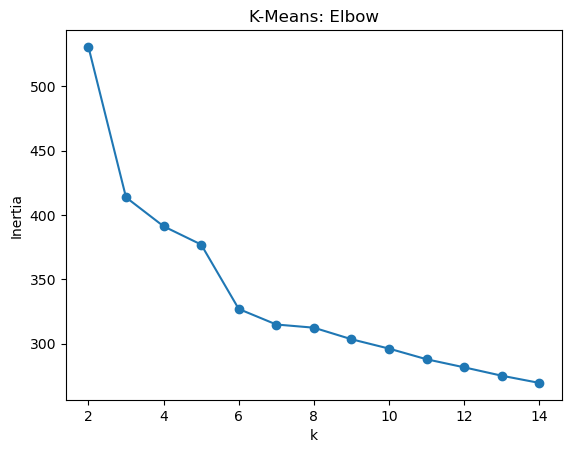

In [ ]:
# กราฟ elbow
plt.figure()
plt.plot(list(ks), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("K-Means: Elbow")
plt.show()

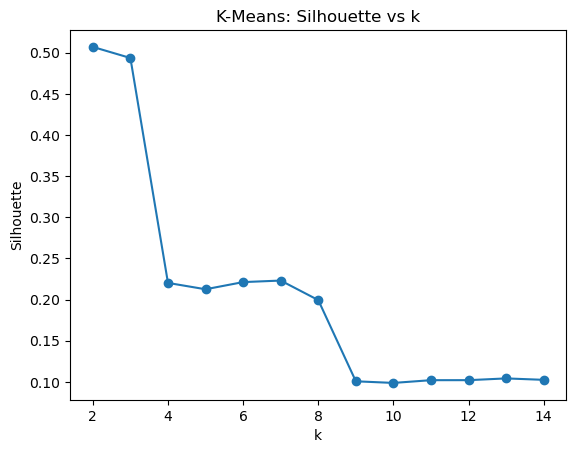

In [ ]:
# กราฟ silhouette
plt.figure()
plt.plot(list(ks), sils, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("K-Means: Silhouette vs k")
plt.show()

In [ ]:
silo = pd.DataFrame({"k": list(ks), "silhouette": sils}, columns=["k", "silhouette"])
silo

silo

,k,silhouette
0,2,0.506978
1,3,0.493521
2,4,0.220297
3,5,0.212593
4,6,0.221293
5,7,0.223163
6,8,0.199437
7,9,0.100787
8,10,0.098818
9,11,0.102151


In [ ]:
# เลือก k ที่ต้องการ
best_k = 3
kmeans = KMeans(best_k, random_state=42)
kmeans_pipe = Pipeline([("prep", preprocessor), ("cluster", kmeans)]) #
kmeans_pipe.fit_predict(df)

array([2, 2, 0, ..., 0, 0, 1])

In [ ]:
#centers_df = pd.DataFrame(kmeans_pipe.named_steps['cluster'].cluster_centers_, columns=feature_names)
#centers_df.to_excel("Shopping_km_centers.xlsx", index=False)
kmeans_pipe.named_steps['cluster'].cluster_centers_

array([[-4.16333634e-16,  5.03890394e-01,  5.14152736e-01,
         5.08596339e-01,  5.03555994e-01,  4.44463960e-01,
         5.01525470e-01,  5.08373860e-01,  2.34162534e-01,
         6.93889390e-17,  7.21644966e-16],
       [ 8.32667268e-17,  5.36188344e-01,  4.96337891e-01,
         5.20061090e-01,  5.10742188e-01,  4.32970982e-01,
         5.09927162e-01,  5.33554688e-01,  2.38898026e-01,
         1.00000000e+00,  0.00000000e+00],
       [ 5.99911907e-01,  5.09064604e-01,  5.12758543e-01,
         5.19668957e-01,  5.02796201e-01,  4.47807297e-01,
         5.10696706e-01,  5.18228417e-01,  2.36179477e-01,
         9.89208633e-02,  1.00000000e+00]])

In [ ]:
kmeans_pipe.named_steps['cluster'].inertia_

413.7239791561268

In [ ]:
labels_km = kmeans_pipe.fit_predict(df)
print(labels_km)

[2 2 0 ... 0 0 1]


In [ ]:
#เพิ่ม label กลับเข้า DataFrame เพื่อวิเคราะห์
df_km = df.copy()
df_km["Cluster"] = labels_km
#print("Silhouette (k-means):", silhouette_score(preprocessor.transform(df), labels_km))
print(df_km.shape)
df_km.head()

"""
out_path = "df_km.xlsx"
df_km.to_excel(out_path, index=False)  # ไม่ต้องเซฟ index
print("saved:", out_path)
"""

(2000, 12)


'\nout_path = "df_km.xlsx"\ndf_km.to_excel(out_path, index=False)  # ไม่ต้องเซฟ index\nprint("saved:", out_path)\n'

In [ ]:
#สรุปจำนวนสมาชิกแต่ละคลัสเตอร์
print(df_km["Cluster"].value_counts().sort_index())

Cluster
0    1316
1     128
2     556
Name: count, dtype: int64


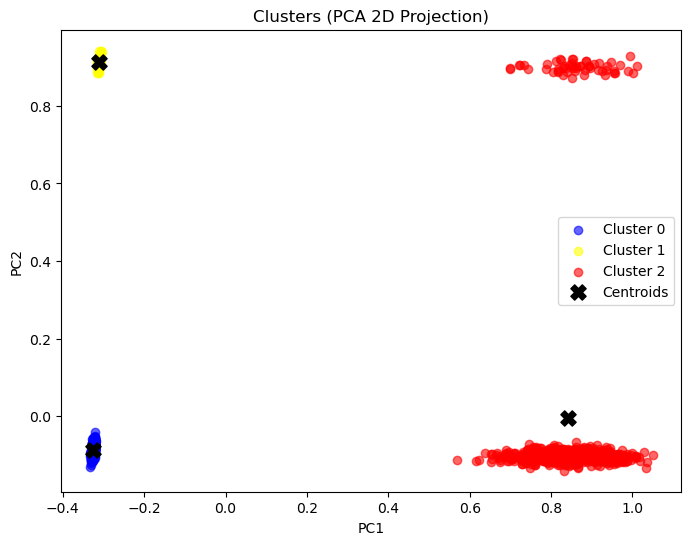

In [ ]:
# ลดมิติข้อมูลเหลือ 2 มิติ
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(preprocessor.transform(df))

# สร้าง DataFrame สำหรับ plot
plot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df["Cluster"] = labels_km

"""
# Plot scatter
plt.figure(figsize=(8,6))
for c in sorted(plot_df["Cluster"].unique()):
    subset = plot_df[plot_df["Cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6)

"""

colors = ['blue', 'yellow', 'red']

plt.figure(figsize=(8,6))
for i, c in enumerate(sorted(plot_df["Cluster"].unique())):
    subset = plot_df[plot_df["Cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6, color=colors[i % len(colors)])

centers_pca = pca.transform(kmeans_pipe.named_steps['cluster'].cluster_centers_)

plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    s=120, c='black', marker='X', label='Centroids'
)


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters (PCA 2D Projection)")
plt.legend()
plt.show()


In [ ]:
print("Shape of components:", pca.components_.shape)
print(np.round(pca.components_, 3))

Shape of components: (2, 11)
[[ 0.523  0.003  0.     0.009 -0.001  0.004  0.007  0.008  0.002  0.014
   0.852]
 [-0.004  0.055 -0.     0.01   0.014 -0.016  0.016  0.046  0.011  0.997
  -0.015]]


In [ ]:
components_df = pd.DataFrame(
    pca.components_.T,  # Transpose เพื่อให้ features เป็น rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

def highlight_top(s):
    is_top2 = abs(s).nlargest(3).index
    return ['background-color: green' if i in is_top2 else '' for i in s.index]

components_df.style.apply(highlight_top, axis=0)

,PC1,PC2
VMailMessage,0.523425,-0.003633
DayMins,0.002529,0.055168
DayCalls,0.000466,-0.000121
EveMins,0.009111,0.009956
EveCalls,-0.001022,0.013912
NightMins,0.003881,-0.016232
NightCalls,0.006575,0.016224
IntlMins,0.007551,0.046002
IntlCalls,0.001837,0.010616
IntlPlan,0.014017,0.996831


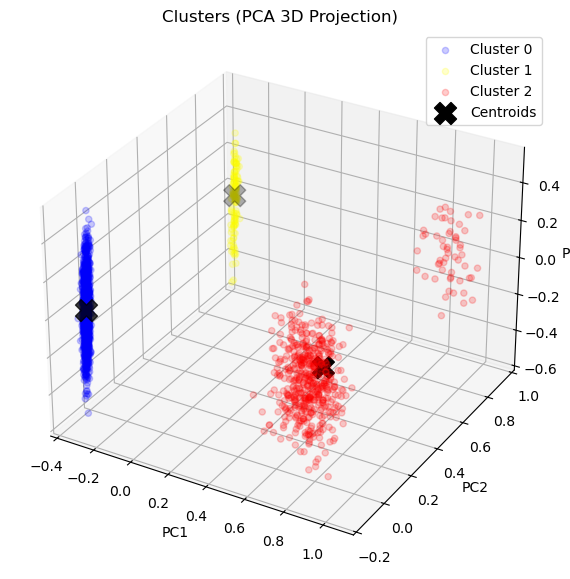

In [ ]:
# 3 มิติ Plot
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(preprocessor.transform(df))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")


"""

scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=labels_km, cmap="tab10", alpha=0.7)
"""
colors = ['blue', 'yellow', 'red']

for i, c in enumerate(sorted(np.unique(labels_km))):
    subset = X_pca3[labels_km == c]
    ax.scatter(subset[:,0], subset[:,1], subset[:,2],
               label=f"Cluster {c}", alpha=0.2, color=colors[i % len(colors)])


centers_pca = pca3.transform(kmeans_pipe.named_steps['cluster'].cluster_centers_)

plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    s=250, c='black', marker='X', label='Centroids'
)



ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clusters (PCA 3D Projection)")
plt.legend()
plt.show()

In [ ]:
print("Shape of components:", pca3.components_.shape)
print(np.round(pca3.components_, 3))

Shape of components: (3, 11)
[[ 0.523  0.003  0.     0.009 -0.001  0.004  0.007  0.008  0.002  0.014
   0.852]
 [-0.004  0.055 -0.     0.01   0.014 -0.016  0.016  0.046  0.011  0.997
  -0.015]
 [ 0.005  0.802  0.358 -0.257  0.369  0.137  0.054 -0.044  0.013 -0.044
  -0.002]]


In [ ]:
components_df = pd.DataFrame(
    pca3.components_.T,  # Transpose เพื่อให้ features เป็น rows
    columns=[f'PC{i+1}' for i in range(pca3.n_components_)],
    index=feature_names
)

def highlight_top(s):
    is_top2 = abs(s).nlargest(3).index
    return ['background-color: green' if i in is_top2 else '' for i in s.index]

components_df.style.apply(highlight_top, axis=0)


,PC1,PC2,PC3
VMailMessage,0.523425,-0.003633,0.004976
DayMins,0.002529,0.055168,0.802455
DayCalls,0.000466,-0.000121,0.358213
EveMins,0.009111,0.009956,-0.256579
EveCalls,-0.001022,0.013912,0.369103
NightMins,0.003881,-0.016232,0.136852
NightCalls,0.006575,0.016224,0.053953
IntlMins,0.007551,0.046002,-0.044044
IntlCalls,0.001837,0.010616,0.012604
IntlPlan,0.014017,0.996831,-0.043725


In [ ]:
def cluster_profile(data_with_labels, label_col="Cluster", top_cat=5):
    out = {}
    for c in sorted(data_with_labels[label_col].unique()):
        sub = data_with_labels[data_with_labels[label_col]==c]
        # ตัวเลข: ค่าเฉลี่ย
        num_mean = sub[numeric_cols].mean().sort_values(ascending=False)
        # หมวดหมู่: นับสัดส่วน (เฉพาะ top_cat)
        cat_props = {}
        for col in categorical_cols:
            props = (sub[col].value_counts(normalize=True)
                     .head(top_cat).map(lambda v: f"{v:.1%}").to_dict())
            cat_props[col] = props
        out[c] = {"n": len(sub), "num_mean": num_mean.to_dict(), "cat_props": cat_props}
    return out

In [ ]:
profile_km = cluster_profile(df_km, "Cluster", top_cat=5)

for c, stats in profile_km.items():
    print(f"\n=== Cluster {c} (n={stats['n']}) ===")

    # ตัวเลข: แสดงเฉลี่ย top 10 ตัวแรก (ตัดให้สั้น)
    num_mean = stats["num_mean"]
    for feat, val in list(num_mean.items())[:10]:
        print(f"- {feat}: {val:.3f}")

    # หมวดหมู่: สัดส่วน
    print("Categoricals:")
    for col, props in stats["cat_props"].items():
        pairs = [f"{k}: {v}" for k, v in props.items()]
        print(f"  • {col} -> " + "; ".join(pairs))


=== Cluster 0 (n=1316) ===
- NightMins: 200.562
- EveMins: 200.308
- DayMins: 178.055
- DayCalls: 100.812
- EveCalls: 100.455
- NightCalls: 99.703
- IntlMins: 10.167
- IntlCalls: 4.449
- VMailMessage: 0.000
Categoricals:
  • IntlPlan -> 0: 100.0%
  • VMailPlan -> 0: 100.0%

=== Cluster 1 (n=128) ===
- EveMins: 204.120
- NightMins: 196.540
- DayMins: 189.301
- EveCalls: 101.375
- NightCalls: 100.820
- DayCalls: 98.531
- IntlMins: 10.671
- IntlCalls: 4.539
- VMailMessage: 0.000
Categoricals:
  • IntlPlan -> 1: 100.0%
  • VMailPlan -> 0: 100.0%

=== Cluster 2 (n=556) ===
- EveMins: 203.990
- NightMins: 201.733
- DayMins: 179.856
- NightCalls: 100.923
- DayCalls: 100.633
- EveCalls: 100.358
- VMailMessage: 29.396
- IntlMins: 10.365
- IntlCalls: 4.487
Categoricals:
  • IntlPlan -> 0: 90.1%; 1: 9.9%
  • VMailPlan -> 1: 100.0%
